In [2]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\database_IND (1).csv")

In [4]:
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

In [5]:
df.rename(columns={'primary_fuel':'Fuel_Type'},inplace=True)

In [6]:
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude Fuel_Type other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407     Solar         NaN         NaN  ...   
1   24.7663    74.6090      Coal         NaN         NaN  ...   
2   21.9038    69.3732      Wind         NaN         NaN  ...   
3   23.8712    91.3602       Gas         NaN         NaN  ...   
4   21.9603    82.4091      Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0                  NaN          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In [7]:
df.shape

(907, 27)

In [8]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
Fuel_Type                    object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   Fuel_Type                 907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [10]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
Fuel_Type                     8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [11]:
df["country"].value_counts()

country
IND    907
Name: count, dtype: int64

In [12]:
df.drop(columns=['country','country_long'],axis=1,inplace=True)

In [13]:
df.drop(columns=['other_fuel2','year_of_capacity_data','generation_data_source','other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)

In [14]:
df['name'].value_counts()

name
ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: count, Length: 907, dtype: int64

In [15]:
df.drop(['name'],axis=1,inplace=True)

In [16]:
df['gppd_idnr'].value_counts()

gppd_idnr
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: count, Length: 907, dtype: int64

In [17]:
df.drop('gppd_idnr',axis=1,inplace=True)

In [18]:
df.drop('owner',axis=1,inplace=True)

In [19]:
df.drop('url',axis=1,inplace=True)

In [20]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
Fuel_Type                0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2013    907
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

In [21]:
sns.heatmap(df.isnull())

<Axes: >

In [23]:
df.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of      capacity_mw  latitude  longitude Fuel_Type other_fuel1  \
0            2.5   28.1839    73.2407     Solar         NaN   
1           98.0   24.7663    74.6090      Coal         NaN   
2           39.2   21.9038    69.3732      Wind         NaN   
3          135.0   23.8712    91.3602       Gas         NaN   
4         1800.0   21.9603    82.4091      Coal         Oil   
..           ...       ...        ...       ...         ...   
902       1600.0   16.2949    77.3568      Coal         Oil   
903          3.0   12.8932    78.1654     Solar         NaN   
904         25.5   15.2758    75.5811      Wind         NaN   
905         80.0   24.3500    73.7477      Coal         NaN   
906         16.5    9.9344    77.4768      Wind         NaN   

     commissioning_year                                source  \
0                2011.0  National Renewable Energy Laboratory   
1                   NaN                  Ultratech

In [24]:
# Treating null values using imputation technique.

In [22]:
df['latitude'].mean()

21.1979181184669

In [23]:
df['latitude']=df['latitude'].fillna(df['latitude'].mean())

In [24]:
df['other_fuel1'].mode()  

0    Oil
Name: other_fuel1, dtype: object

In [25]:
df['geolocation_source'].mode() 

0    WRI
Name: geolocation_source, dtype: object

In [26]:
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])

In [27]:
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [28]:
df['longitude']=df['longitude'].fillna(df['longitude'].median())
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].median())
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].median())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())

In [29]:
df.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
Fuel_Type                0
other_fuel1              0
commissioning_year       0
source                   0
geolocation_source       0
generation_gwh_2013    907
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

<Axes: >

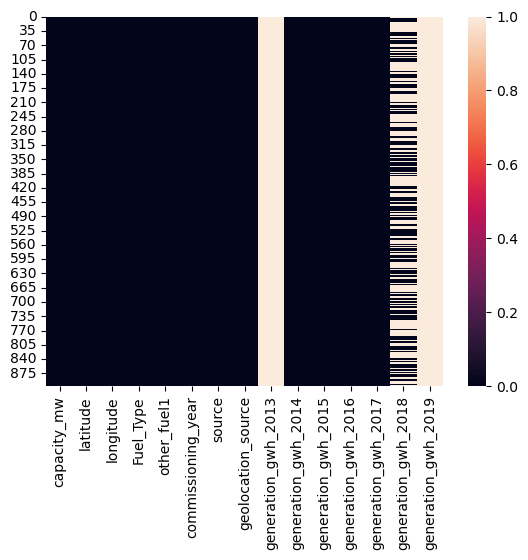

In [30]:
sns.heatmap(df.isnull())

In [31]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019'],
      dtype='object')

In [32]:
df['capacity_mw'].value_counts()

capacity_mw
5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: count, Length: 361, dtype: int64

In [33]:
df['Fuel_Type'].value_counts()

Fuel_Type
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: count, dtype: int64

In [34]:
df['Fuel_Type'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [35]:
df['commissioning_year'].value_counts()

commissioning_year
2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1954.0      1
1969.0      1
1939.0      1
1927.0      1
1953.0      1
Name: count, Length: 73, dtype: int64

In [36]:
df['Power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

In [37]:
df.head()

capacity_mw  latitude  longitude Fuel_Type other_fuel1  \
0          2.5   28.1839    73.2407     Solar         Oil   
1         98.0   24.7663    74.6090      Coal         Oil   
2         39.2   21.9038    69.3732      Wind         Oil   
3        135.0   23.8712    91.3602       Gas         Oil   
4       1800.0   21.9603    82.4091      Coal         Oil   

                                 source                    geolocation_source  \
0  National Renewable Energy Laboratory  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd                                   WRI   
2                                   CDM                                   WRI   
3         Central Electricity Authority                                   WRI   
4         Central Electricity Authority                                   WRI   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                  NaN           801.123775           711.181225   
1                  NaN           801.123775           711.181225   
2                  NaN           801.123775           711.181225   
3                  NaN           617.789264           843.747000   
4                  NaN          3035.550000          5916.370000   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0           737.205450           817.977250                  NaN   
1           737.205450           817.977250                  NaN   
2           737.205450           817.977250                  NaN   
3           886.004428           663.774500           626.239128   
4          6243.000000          5385.579736          7279.000000   

   generation_gwh_2019  Power_plant_age  
0                  NaN              7.0  
1                  NaN             17.0  
2                  NaN             17.0  
3                  NaN             14.0  
4                  NaN              3.0

In [38]:
df.loc[df['capacity_mw']==" "]

Empty DataFrame
Columns: [capacity_mw, latitude, longitude, Fuel_Type, other_fuel1, source, geolocation_source, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, Power_plant_age]
Index: []

In [39]:
df.describe()

capacity_mw    latitude   longitude  generation_gwh_2013  \
count   907.000000  907.000000  907.000000                  0.0   
mean    326.223755   21.197918   77.427103                  NaN   
std     590.085456    6.079148    4.815073                  NaN   
min       0.000000    8.168900   68.644700                  NaN   
25%      16.725000   17.072000   74.388900                  NaN   
50%      59.200000   21.281800   76.719500                  NaN   
75%     385.250000   25.176450   79.206100                  NaN   
max    4760.000000   34.649000   95.408000                  NaN   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
count           907.000000           907.000000           907.000000   
mean           1516.689956          1510.071296          1565.361383   
std            2785.604307          2984.994556          3005.087210   
min               0.000000             0.000000             0.000000   
25%             801.123775           711.181225           737.205450   
50%             801.123775           711.181225           737.205450   
75%             801.123775           711.181225           737.205450   
max           28127.000000         30539.000000         30015.000000   

       generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
count           907.000000           448.000000                  0.0   
mean           1657.121797          2600.804099                  NaN   
std            3046.862910          4314.880456                  NaN   
min               0.000000             0.000000                  NaN   
25%             817.977250           193.378250                  NaN   
50%             817.977250           751.644375                  NaN   
75%             817.977250          3143.535900                  NaN   
max           35116.000000         35136.000000                  NaN   

       Power_plant_age  
count       907.000000  
mean         19.271224  
std          13.158621  
min           0.000000  
25%          15.000000  
50%          17.000000  
75%          20.000000  
max          91.000000

In [40]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Fuel_Type', 'other_fuel1', 'source', 'geolocation_source']


In [41]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'Power_plant_age']


In [45]:
print(df['Fuel_Type'].value_counts)
plt.figure.figsize=(8,6)
sns.countplot(df['Fuel_Type'])
plt.show

<bound method IndexOpsMixin.value_counts of 0      Solar
1       Coal
2       Wind
3        Gas
4       Coal
       ...  
902     Coal
903    Solar
904     Wind
905     Coal
906     Wind
Name: Fuel_Type, Length: 907, dtype: object>


ValueError: could not convert string to float: 'Solar'

In [51]:
print(df['other_fuel1'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot.df('other_fuel1')
plt.show

other_fuel1
Oil             904
Gas               2
Cogeneration      1
Name: count, dtype: int64


AttributeError: 'function' object has no attribute 'df'

<Figure size 800x600 with 0 Axes>

geolocation_source
WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: count, dtype: int64


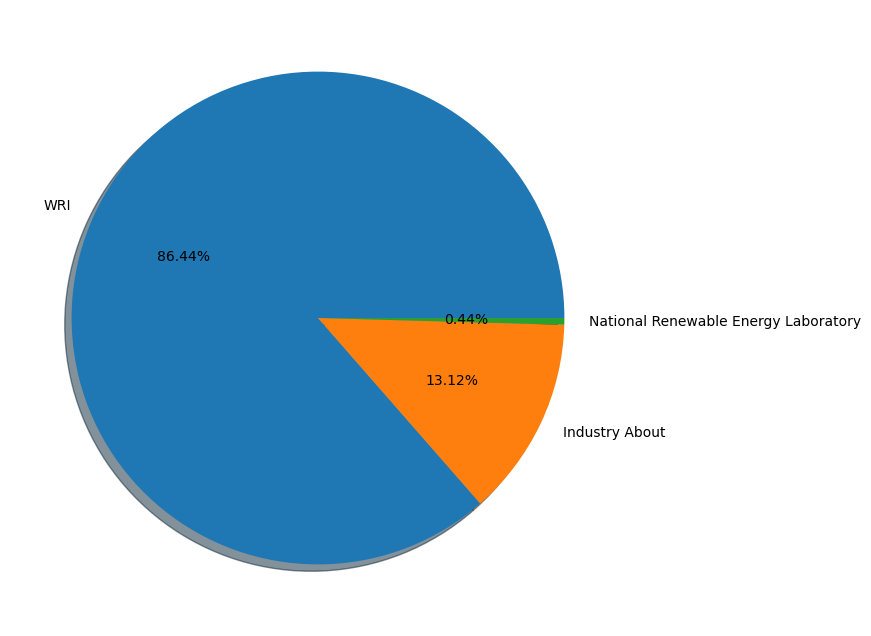

In [52]:
print(df['geolocation_source'].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

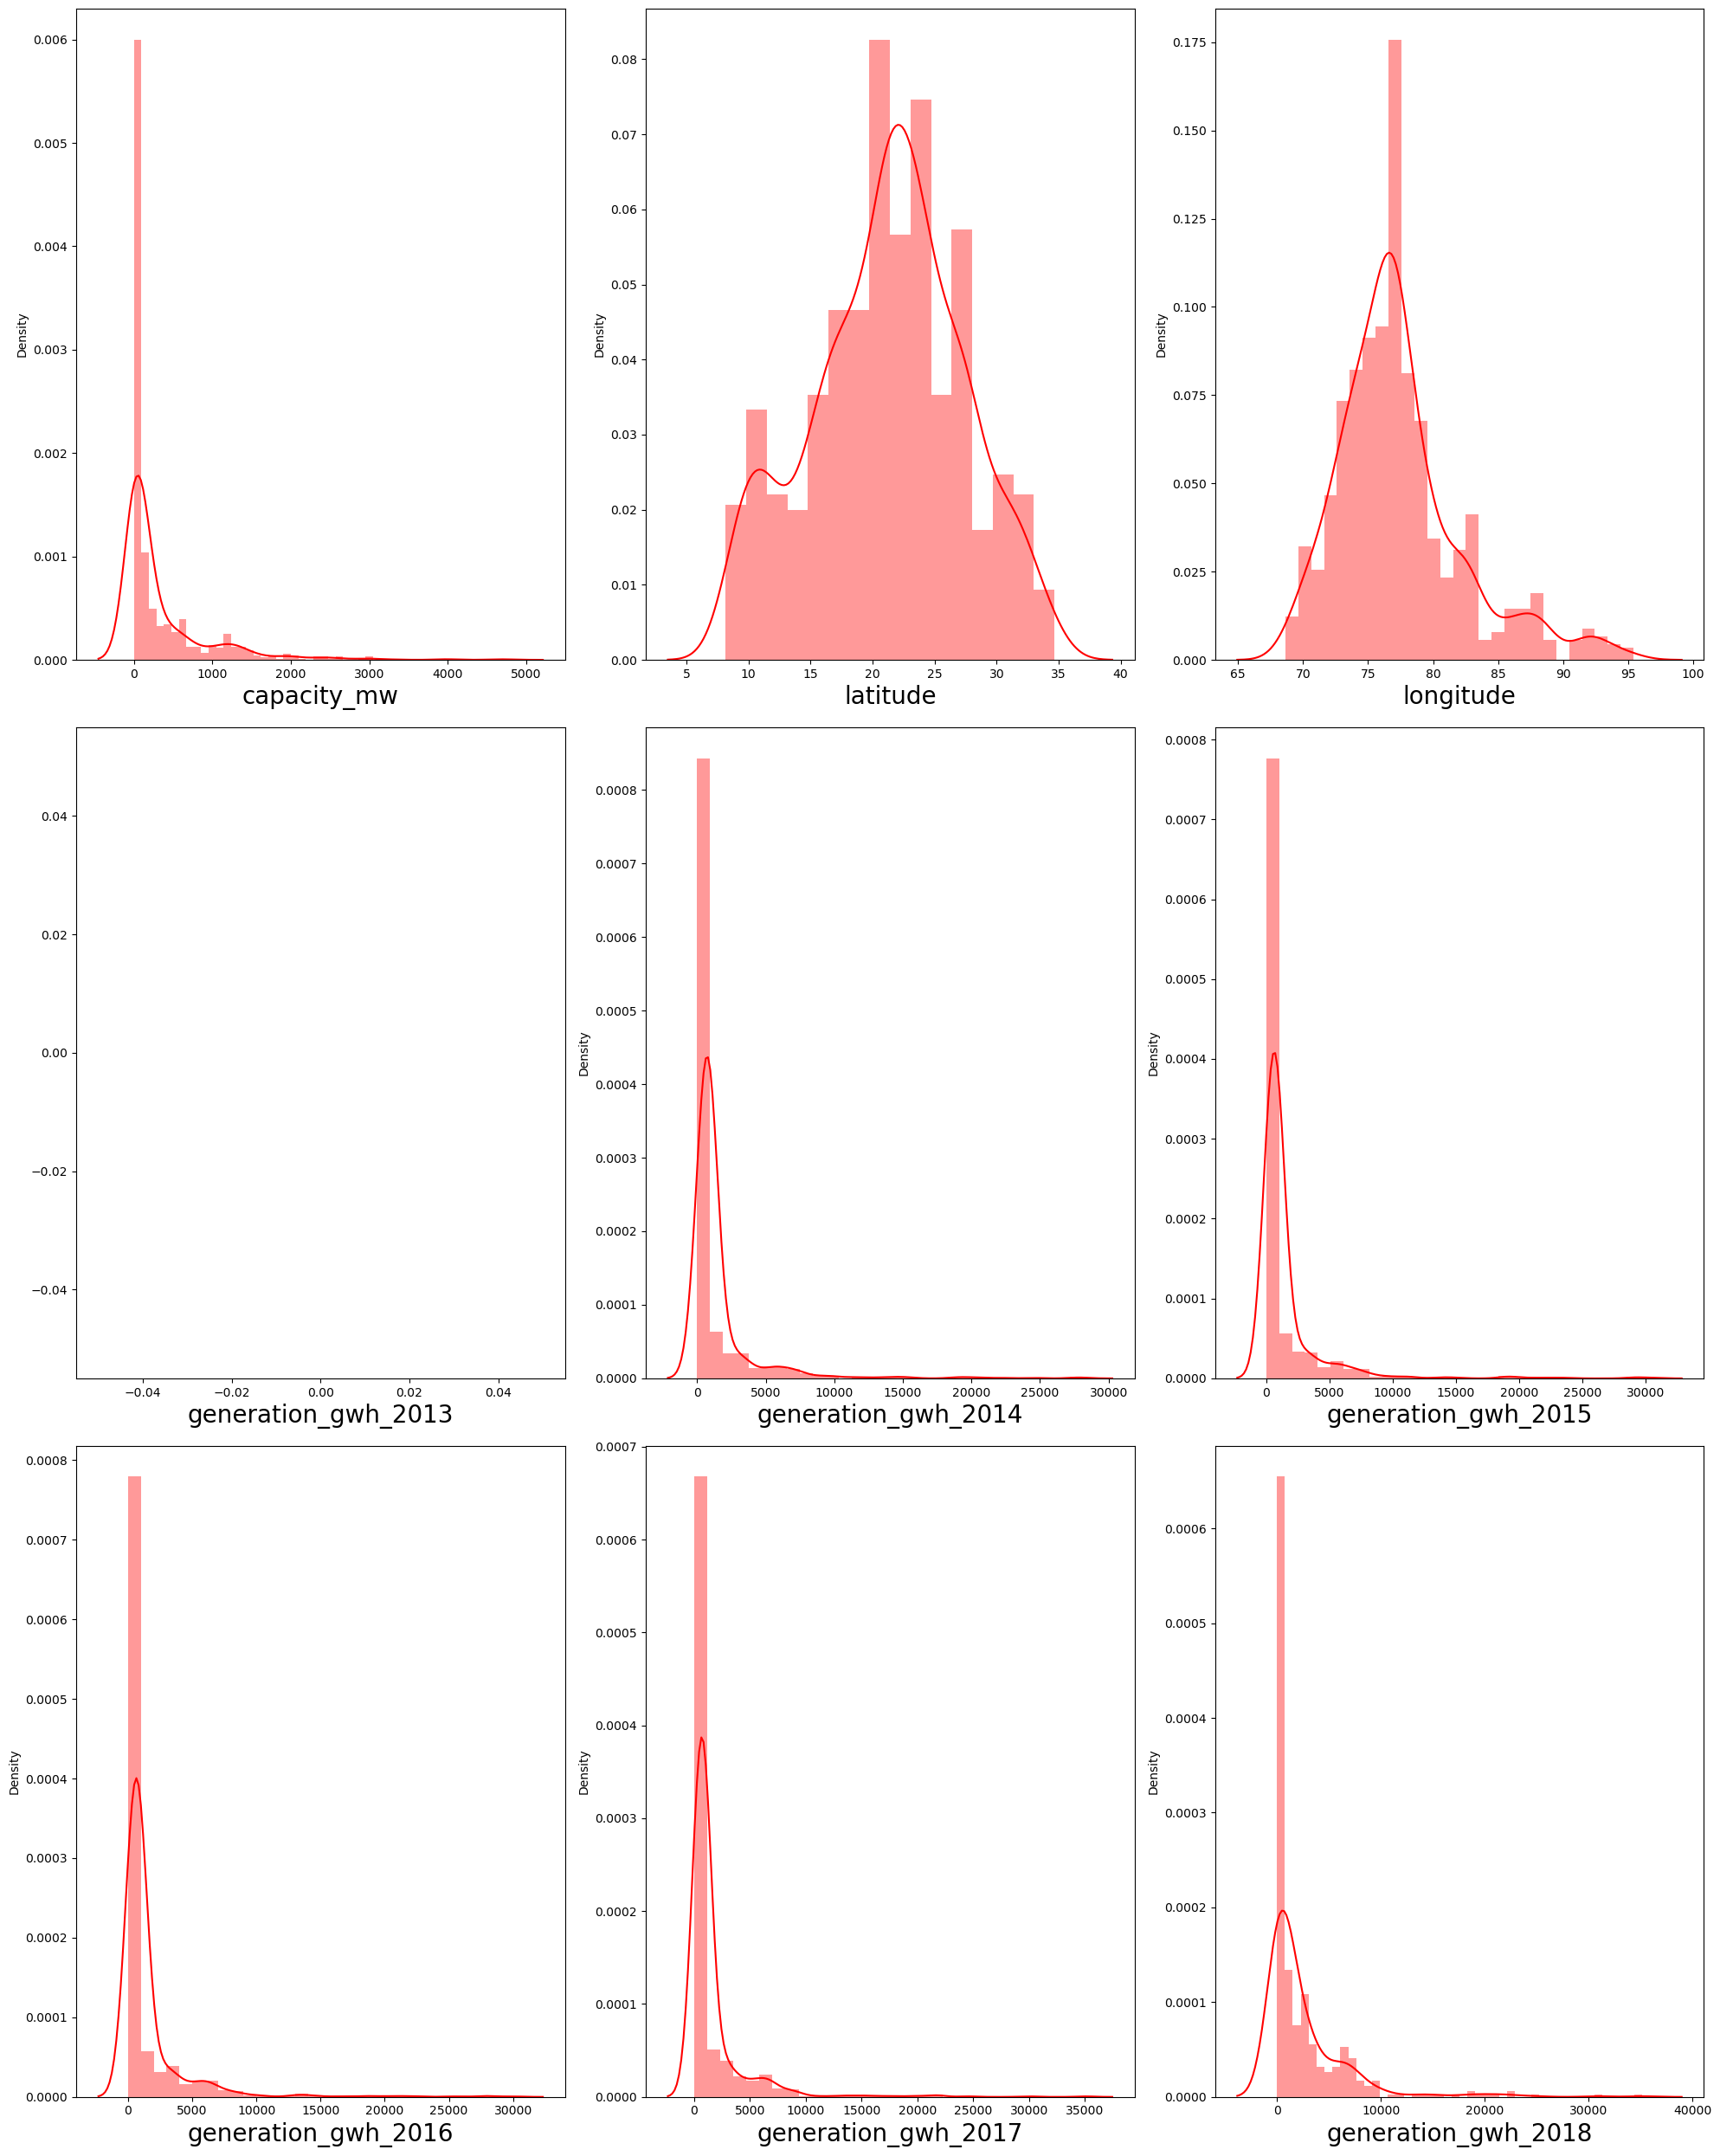

In [53]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

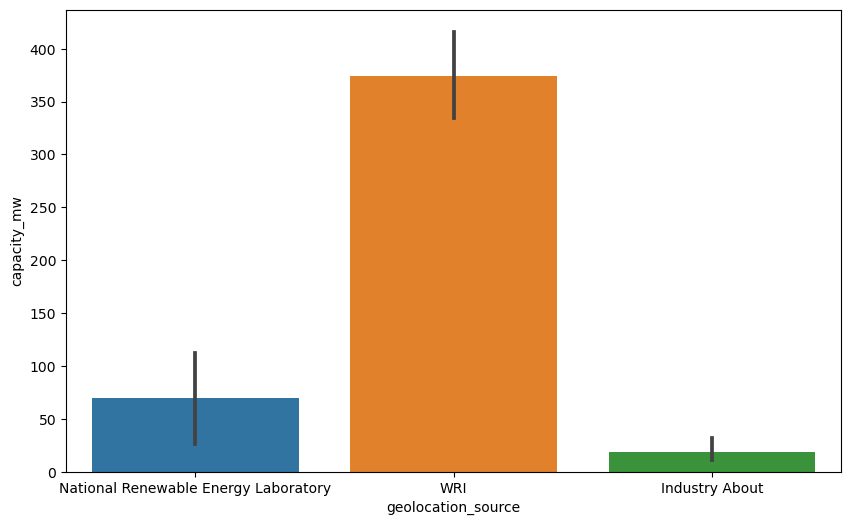

In [54]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'geolocation_source', y = 'capacity_mw', data=df)
plt.show()

In [56]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(df['Power_plant_age'],df['capacity_mw'],color = 'g');

TypeError: Bbox.from_bounds() missing 1 required positional argument: 'height'

In [57]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(df['latitude'],df['capacity_mw'])

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

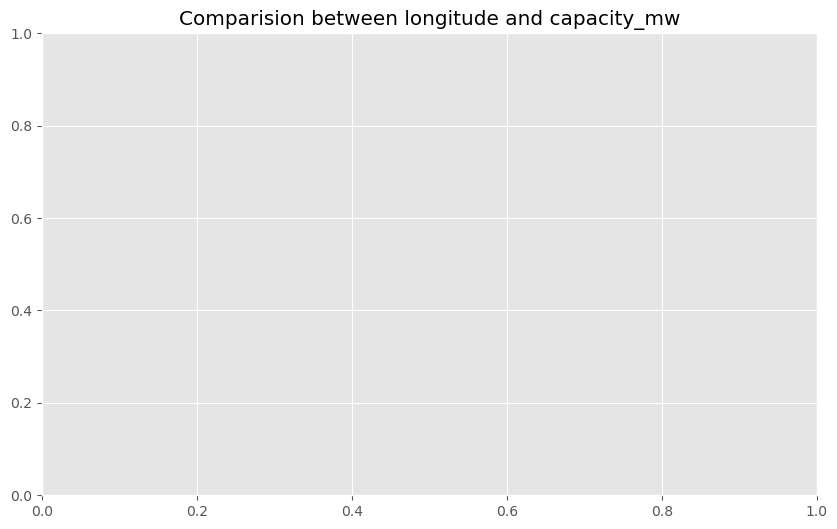

In [58]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(df['longitude'],df['capacity_mw']);

In [59]:
plt.figure(figsize = (10,6))
plt.title('Comparision between generation_gwh_2013 and capacity_mw')
sns.scatterplot(x = 'generation_gwh_2013', y = 'capacity_mw', data = df,color='g')
plt.show()

In [60]:
fig,axes=plt.subplots(2,2,figsize=(15,12))


sns.lineplot(x='generation_gwh_2014', y='capacity_mw',ax=axes[0,0],data=df,color='g')


sns.lineplot(x='generation_gwh_2015', y='capacity_mw',ax=axes[0,1],data=df,color='indigo')


sns.scatterplot(x='generation_gwh_2016', y='capacity_mw',ax=axes[1,0],data=df,color='g')

sns.scatterplot(x='generation_gwh_2017', y='capacity_mw',ax=axes[1,1],data=df,color='r')
plt.show()

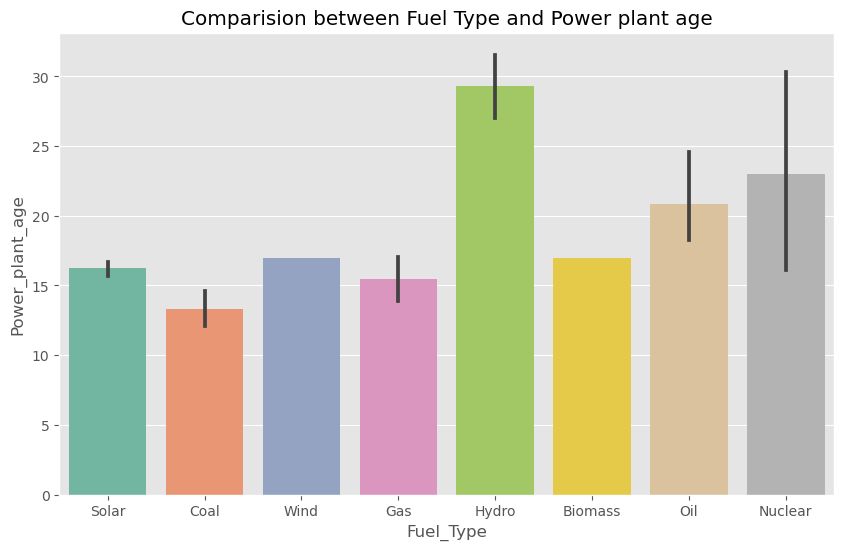

In [61]:
plt.figure(figsize = (10,6))
plt.title("Comparision between Fuel Type and Power plant age")
sns.barplot(x='Fuel_Type',y='Power_plant_age', data=df,palette='Set2')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

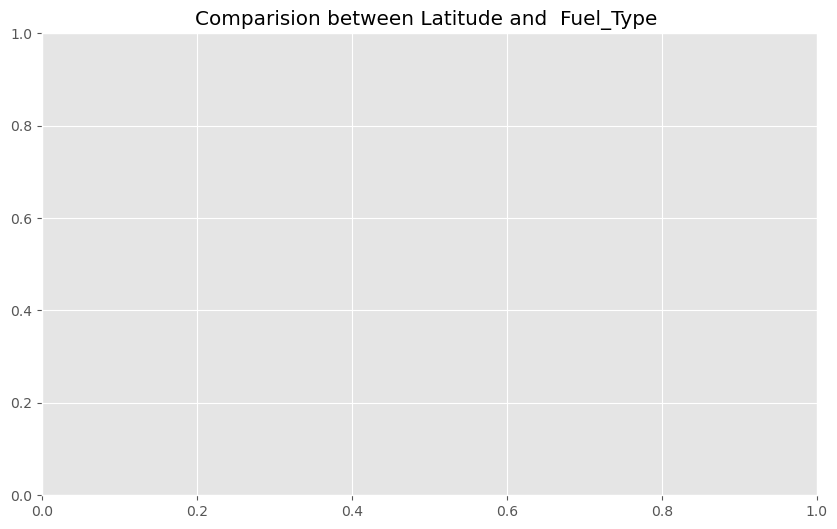

In [62]:
plt.figure(figsize = (10,6))
plt.title("Comparision between Latitude and  Fuel_Type ")
sns.barplot(df['Fuel_Type'],df['latitude'],palette='husl');

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

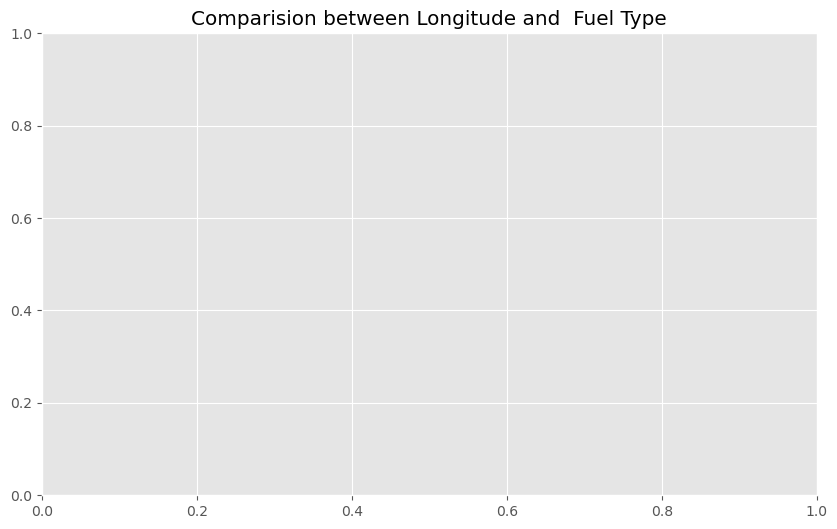

In [63]:
plt.figure(figsize = [10,6])
plt.style.use('ggplot')
plt.title("Comparision between Longitude and  Fuel Type")
sns.boxplot(df['Fuel_Type'],df['longitude']);

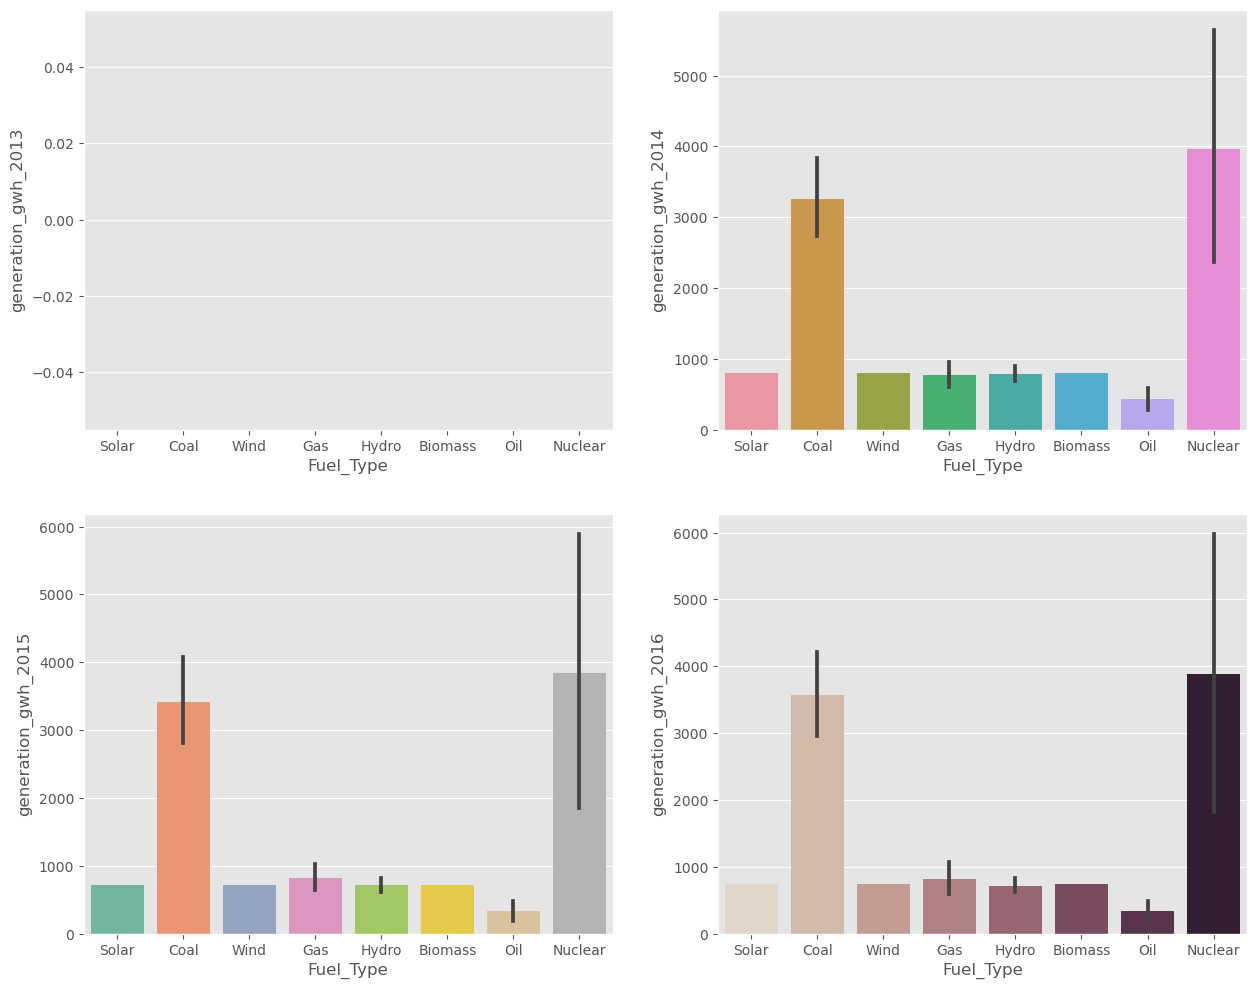

In [64]:
fig,axes=plt.subplots(2,2,figsize=(15,12))


sns.barplot(x='Fuel_Type',y='generation_gwh_2013',ax=axes[0,0],data=df)


sns.barplot(x='Fuel_Type',y='generation_gwh_2014',ax=axes[0,1],data=df)


sns.barplot(x='Fuel_Type',y='generation_gwh_2015',ax=axes[1,0],data=df,palette="Set2")


sns.barplot(x='Fuel_Type',y='generation_gwh_2016',ax=axes[1,1],data=df,palette="ch:.25")
plt.show()

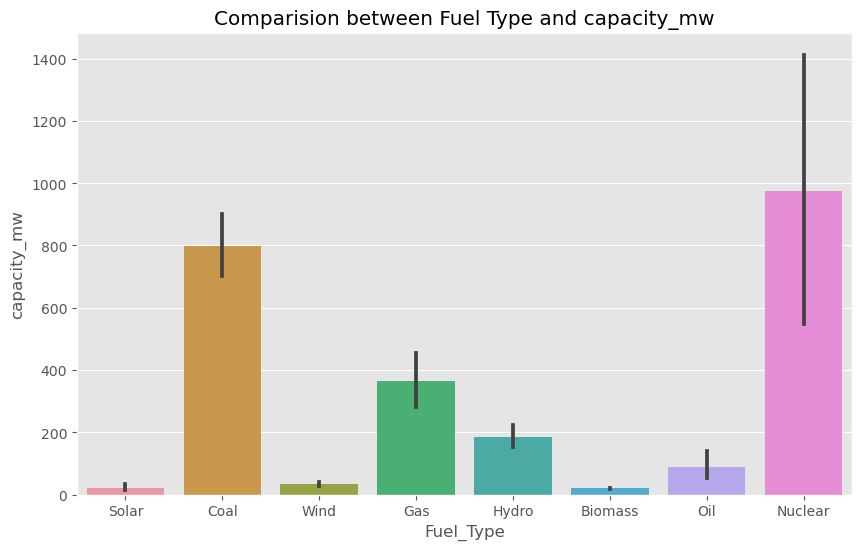

In [65]:
plt.figure(figsize=(10,6))
plt.title("Comparision between Fuel Type and capacity_mw")
sns.barplot(x= 'Fuel_Type',y = 'capacity_mw',data = df)
plt.show()

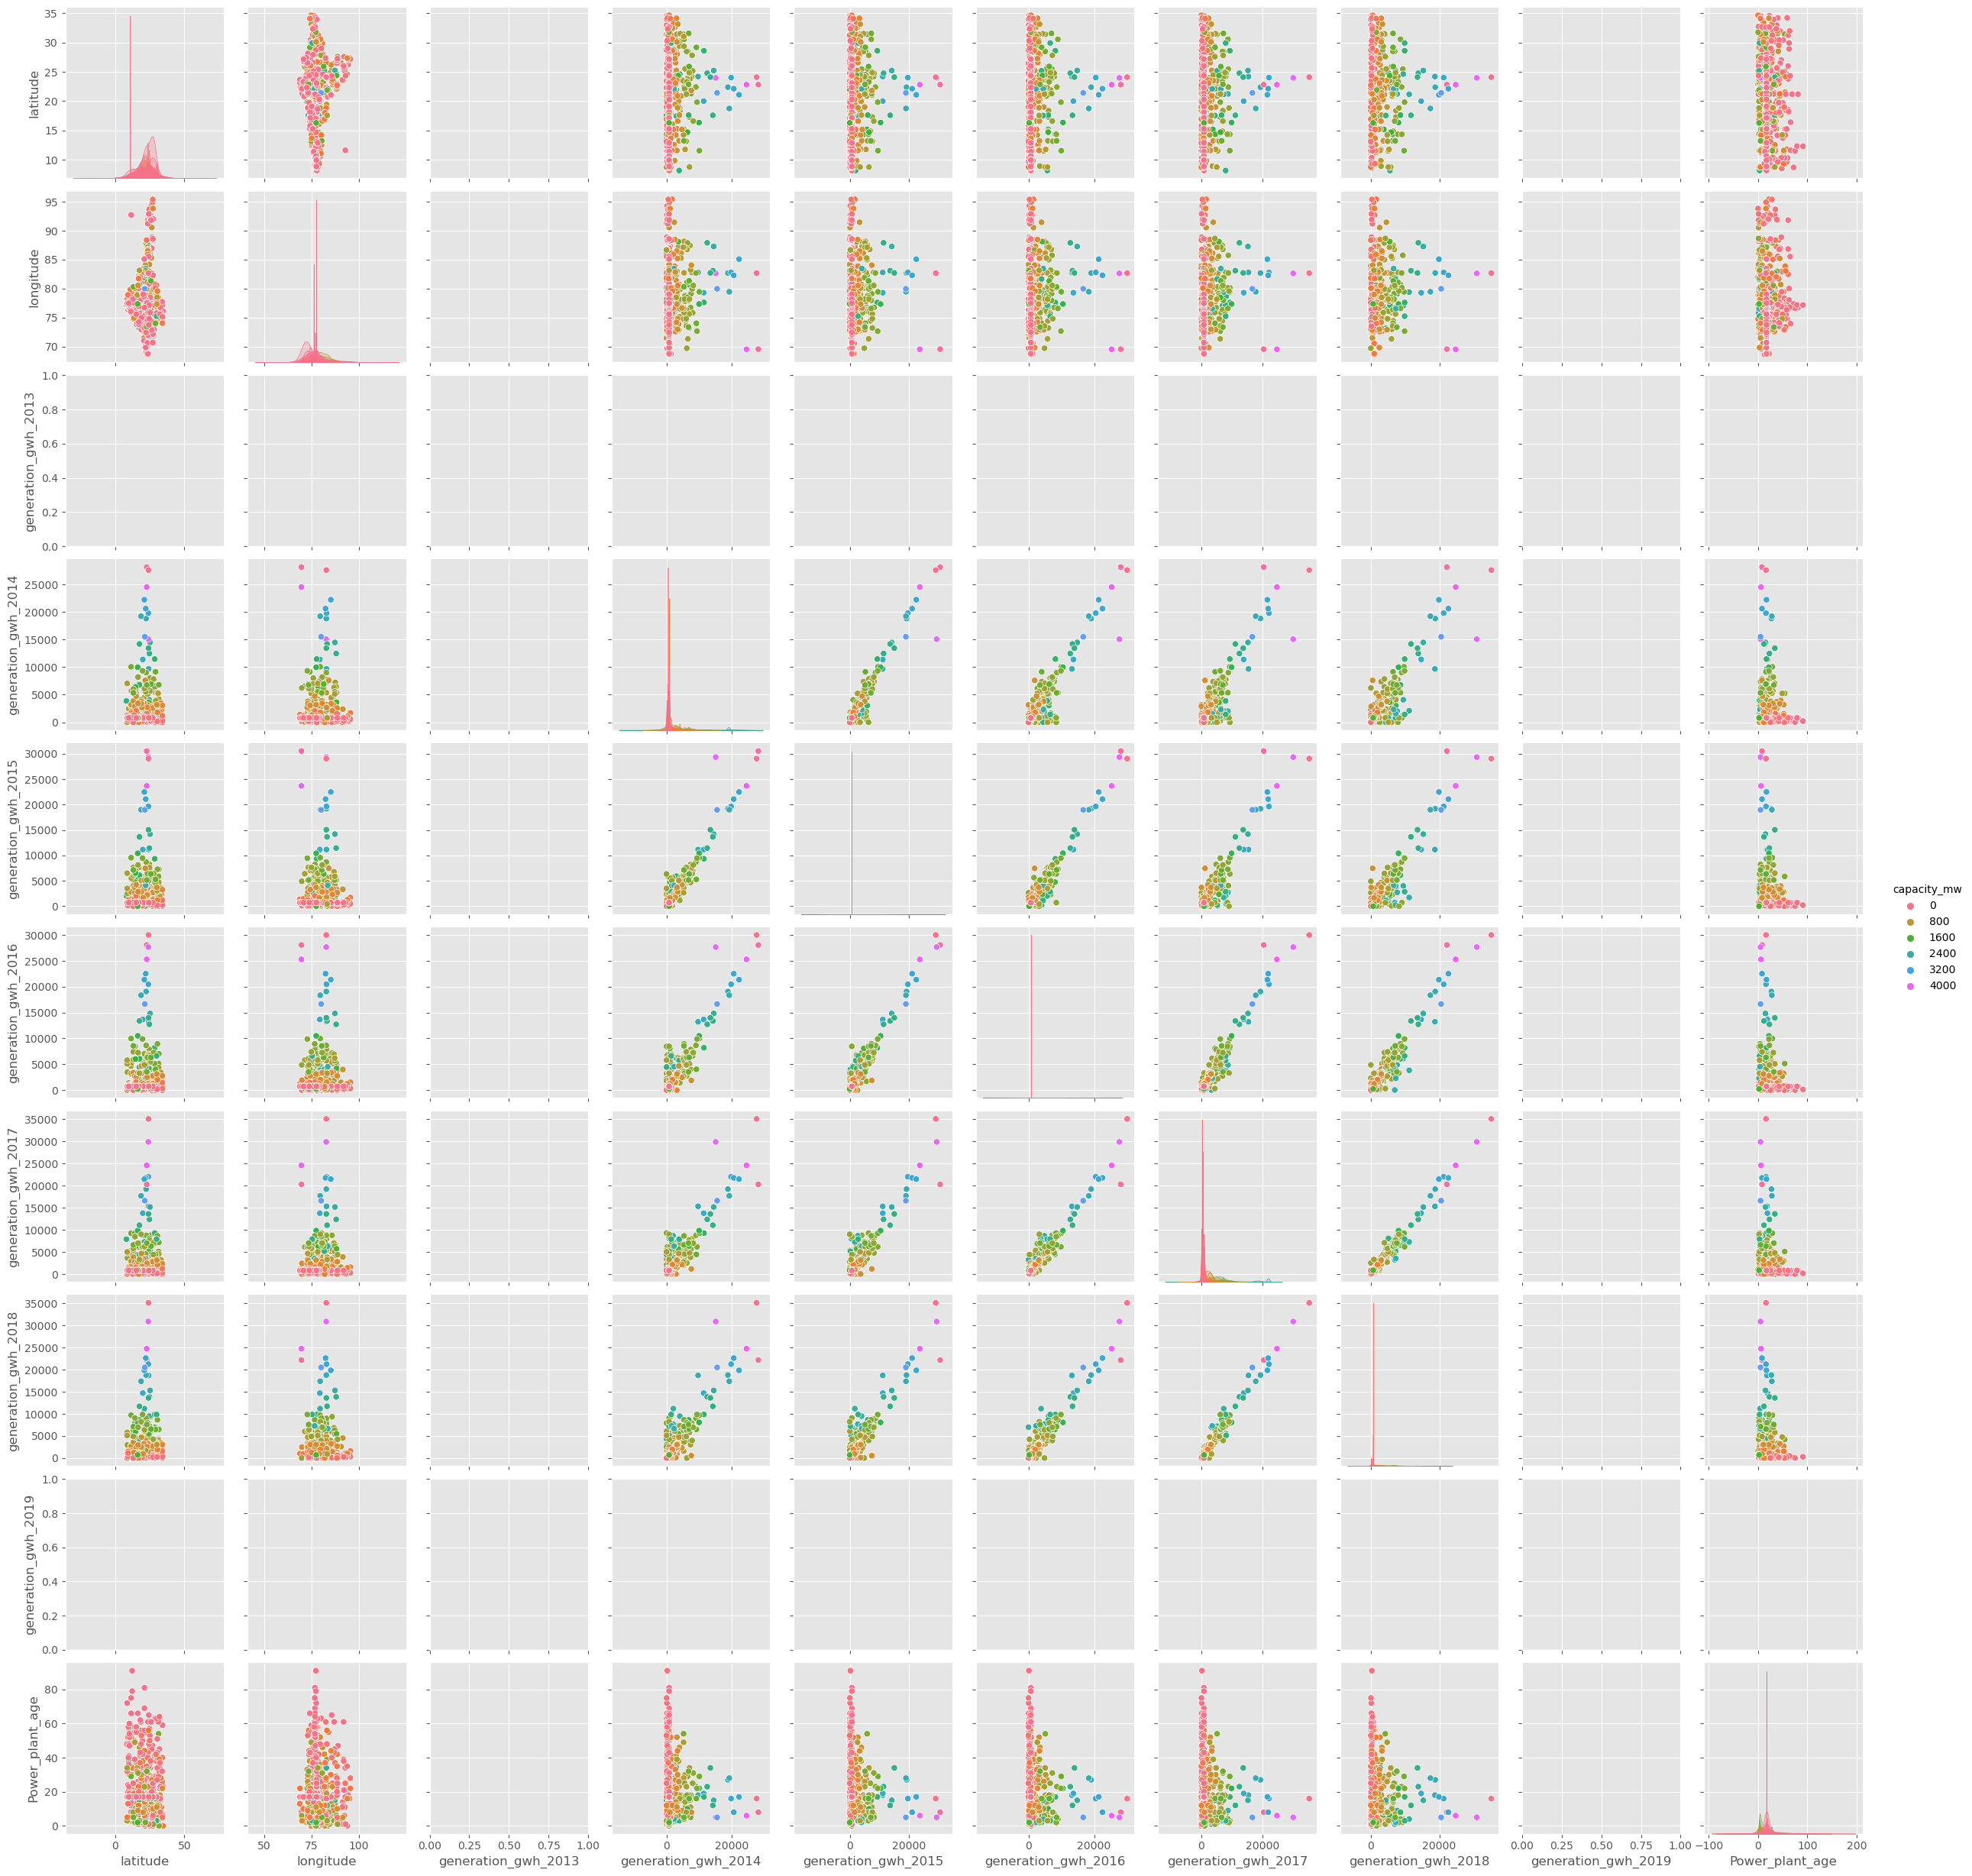

In [66]:
sns.pairplot(df,hue='capacity_mw',palette='husl')

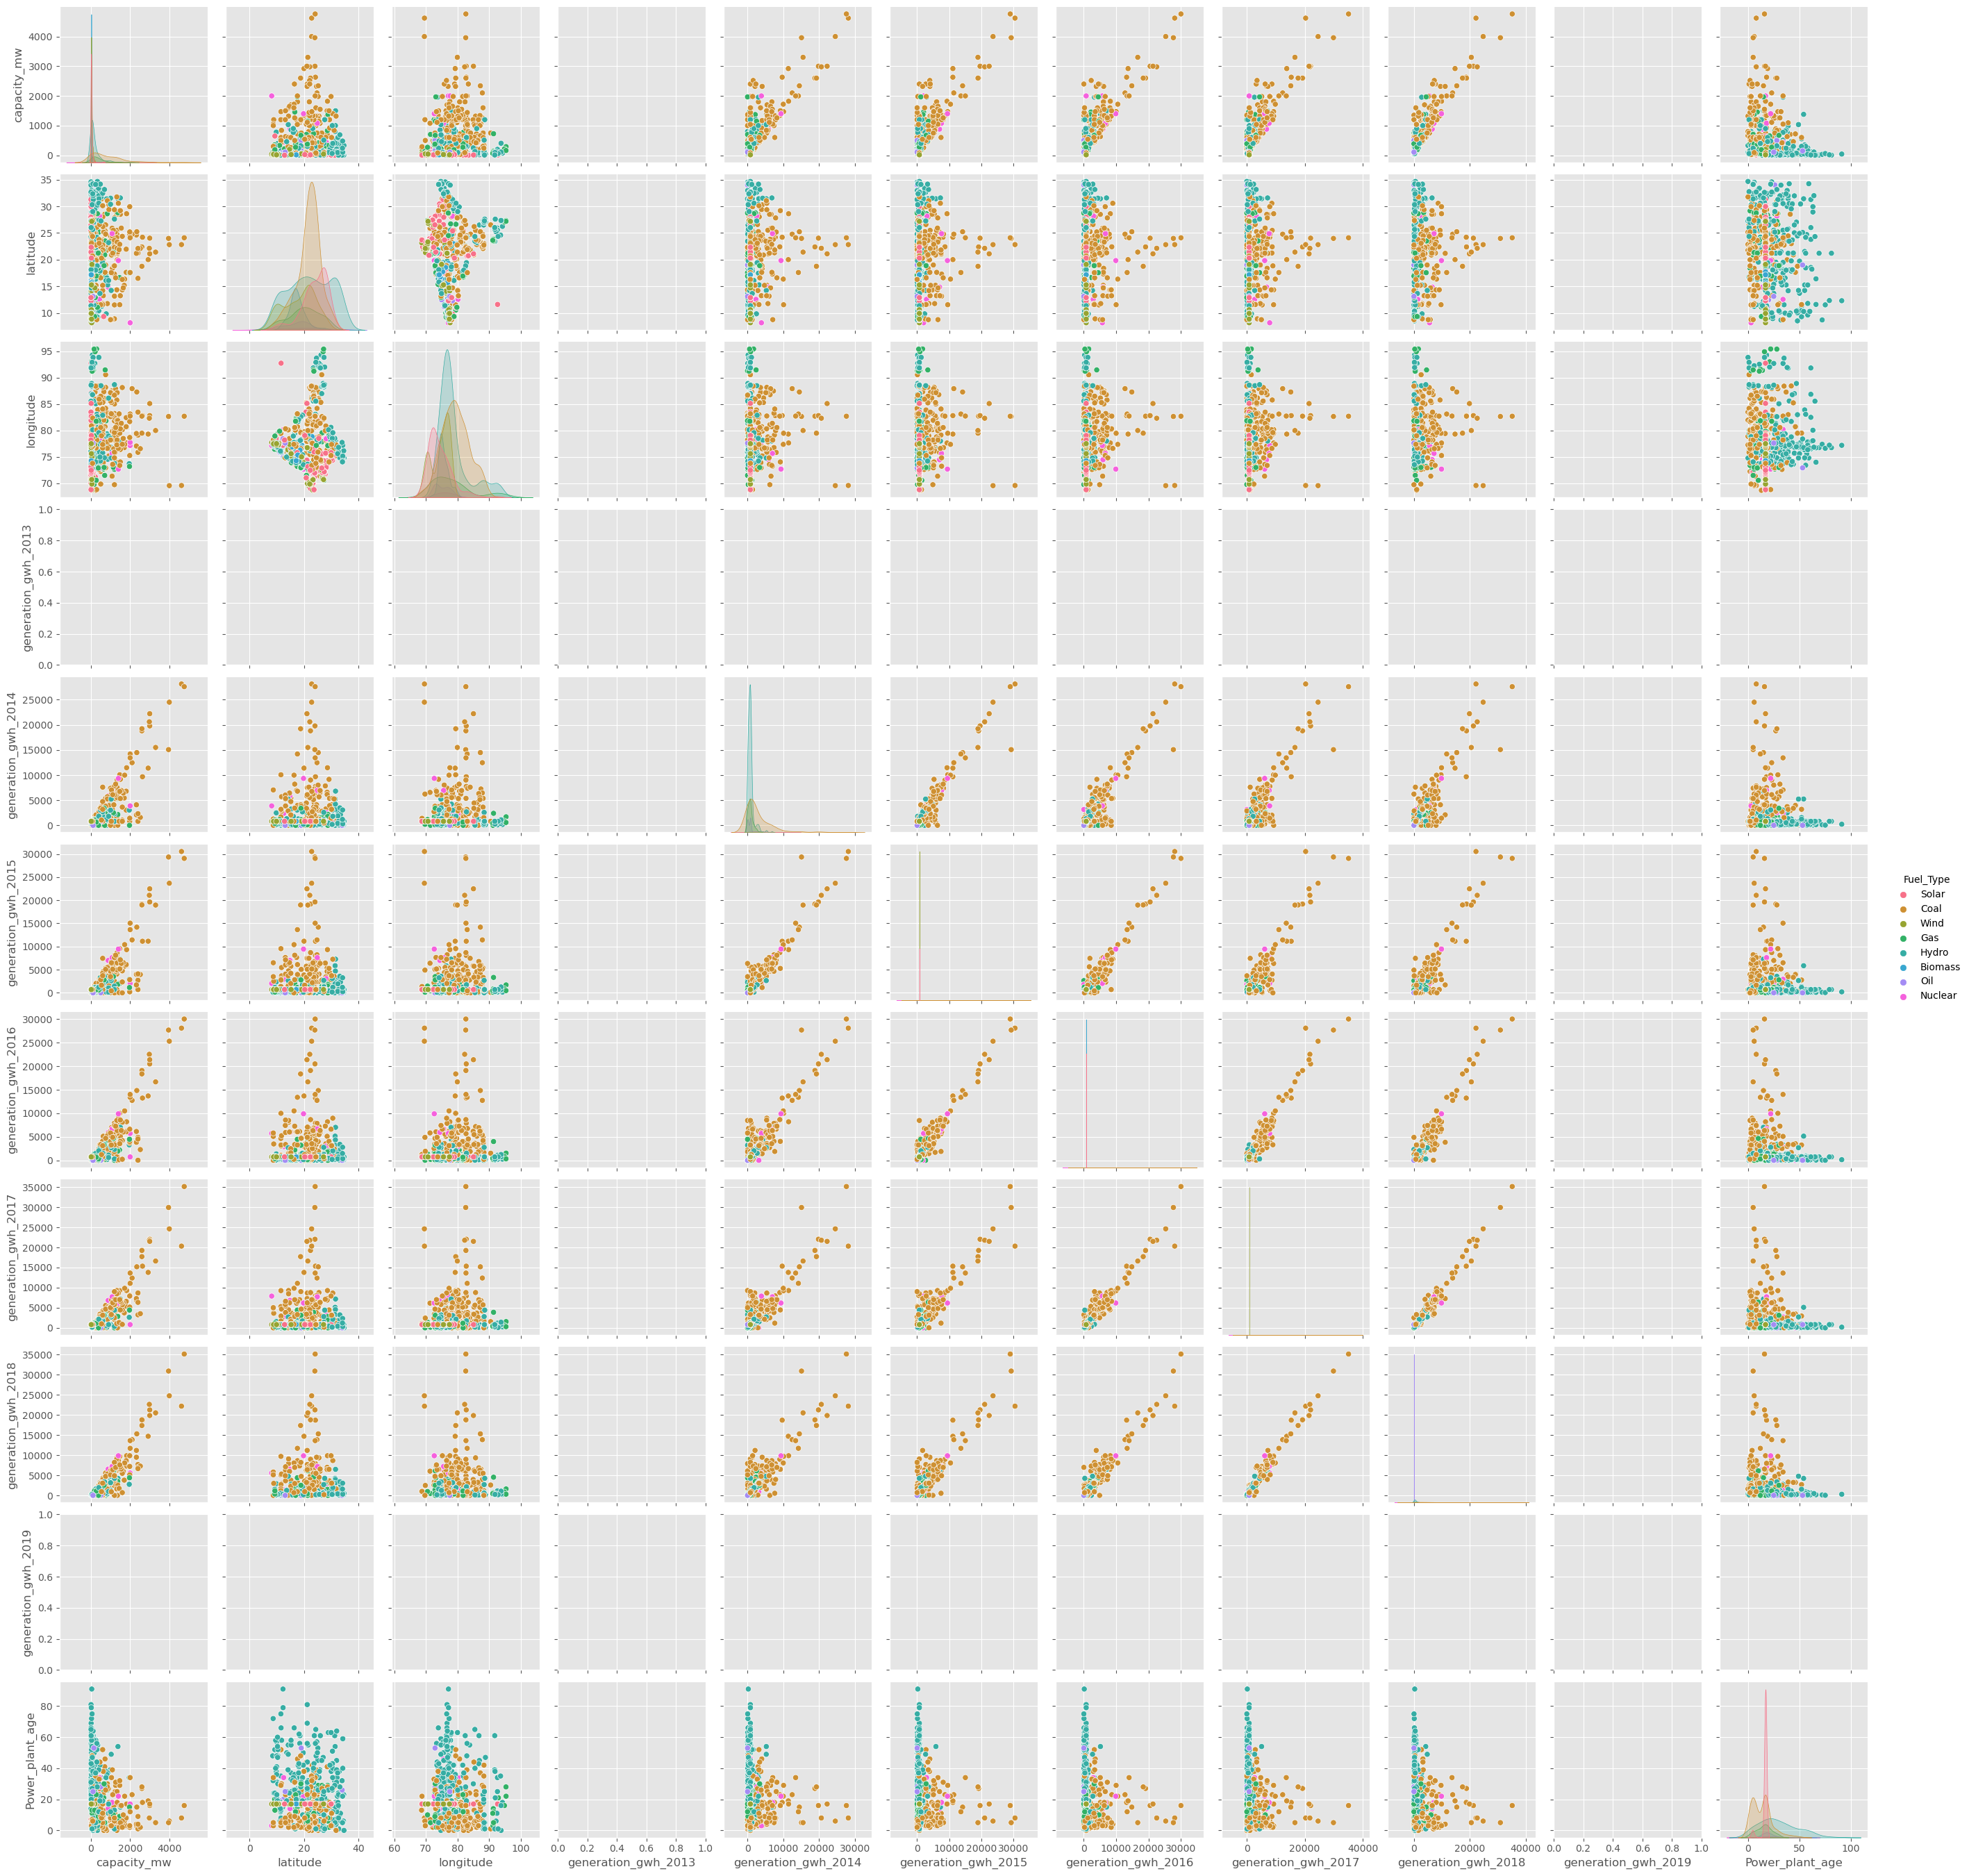

In [67]:
sns.pairplot(df,hue='Fuel_Type',palette='husl')

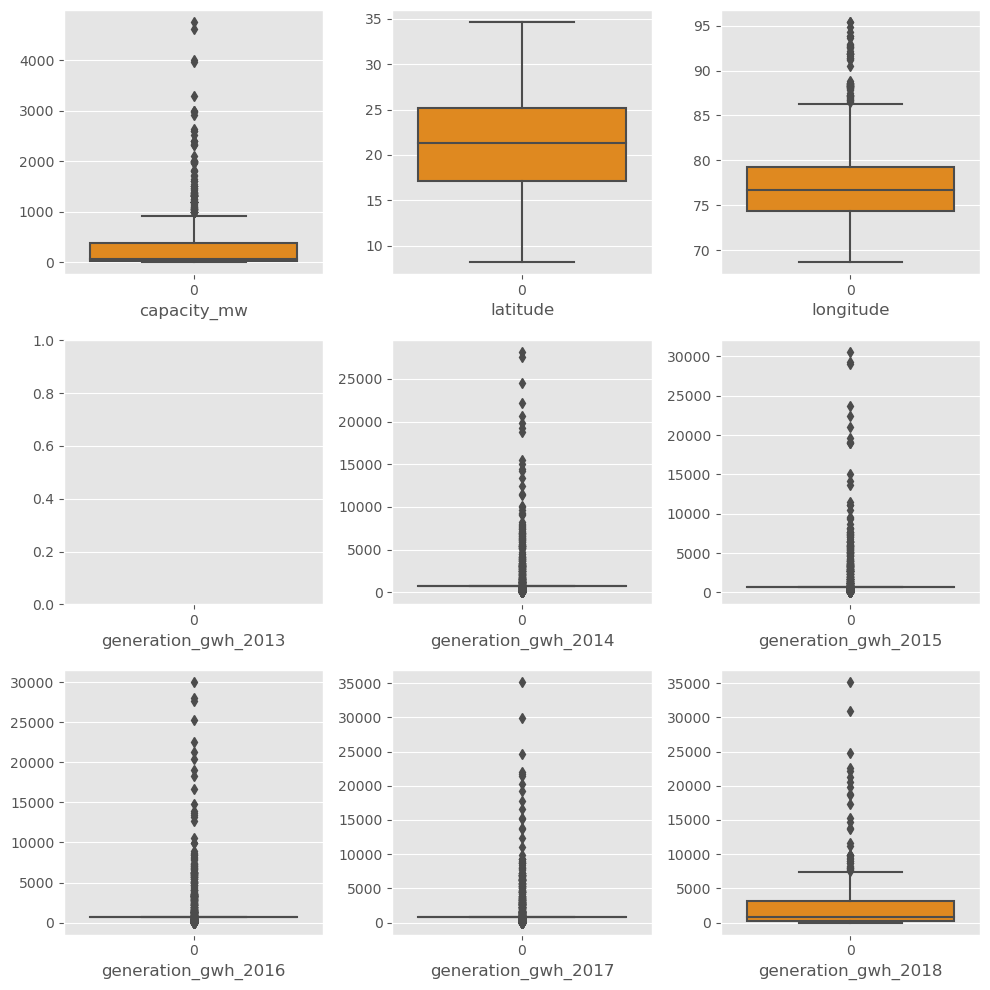

In [68]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color='darkorange')
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [69]:
features = df[['longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']]

In [70]:
from scipy.stats import zscore

z=np.abs(zscore(features))
z


longitude  generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0     0.869917                  NaN             0.257022             0.267783   
1     0.585590                  NaN             0.257022             0.267783   
2     1.673567                  NaN             0.257022             0.267783   
3     2.895239                  NaN             0.322873             0.223348   
4     1.035238                  NaN             0.545554             1.476964   
..         ...                  ...                  ...                  ...   
902   0.014609                  NaN             0.257022             0.505833   
903   0.153415                  NaN             0.257022             0.267783   
904   0.383592                  NaN             0.257022             0.267783   
905   0.764564                  NaN             0.257022             0.267783   
906   0.010327                  NaN             0.257022             0.267783   

     generation_gwh_2016  generation_gwh_2017  Power_plant_age  
0               0.275737             0.275565         0.933076  
1               0.275737             0.275565         0.172699  
2               0.275737             0.275565         0.172699  
3               0.226194             0.326203         0.400812  
4               1.557432             1.224379         1.237227  
..                   ...                  ...              ...  
902             0.443415             0.259992         1.313265  
903             0.275737             0.275565         0.172699  
904             0.275737             0.275565         0.172699  
905             0.275737             0.275565         0.172699  
906             0.275737             0.275565         0.172699  

[907 rows x 7 columns]

In [71]:
new_df= df[(z<3).all(axis=1)]
new_df

Empty DataFrame
Columns: [capacity_mw, latitude, longitude, Fuel_Type, other_fuel1, source, geolocation_source, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, Power_plant_age]
Index: []

In [72]:
df.shape

(907, 15)

In [73]:
new_df.shape

(0, 15)

In [74]:
data_loss = (908-852)/908*100
data_loss

6.167400881057269

In [75]:
Q1 = features.quantile(0.25)

Q3 = features.quantile(0.75)

#IQR
IQR = Q3-Q1

df1= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

ValueError: Operands are not aligned. Do `left, right = left.align(right, axis=1, copy=False)` before operating.

In [76]:
df1.shape

NameError: name 'df1' is not defined

In [77]:
data_loss = (908-422)/908*100
data_loss

53.524229074889874

In [78]:
categorical_col = ['Fuel_Type', 'other_fuel1','source','geolocation_source']

In [79]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
new_df[categorical_col]=new_df[categorical_col].apply(LE.fit_transform)

ValueError: Length of values (0) does not match length of index (4)

In [80]:
new_df[categorical_col]

Empty DataFrame
Columns: [Fuel_Type, other_fuel1, source, geolocation_source]
Index: []

In [81]:
cor = new_df.corr()
cor

capacity_mw  latitude  longitude  Fuel_Type  other_fuel1  \
capacity_mw                  NaN       NaN        NaN        NaN          NaN   
latitude                     NaN       NaN        NaN        NaN          NaN   
longitude                    NaN       NaN        NaN        NaN          NaN   
Fuel_Type                    NaN       NaN        NaN        NaN          NaN   
other_fuel1                  NaN       NaN        NaN        NaN          NaN   
source                       NaN       NaN        NaN        NaN          NaN   
geolocation_source           NaN       NaN        NaN        NaN          NaN   
generation_gwh_2013          NaN       NaN        NaN        NaN          NaN   
generation_gwh_2014          NaN       NaN        NaN        NaN          NaN   
generation_gwh_2015          NaN       NaN        NaN        NaN          NaN   
generation_gwh_2016          NaN       NaN        NaN        NaN          NaN   
generation_gwh_2017          NaN       NaN        NaN        NaN          NaN   
generation_gwh_2018          NaN       NaN        NaN        NaN          NaN   
generation_gwh_2019          NaN       NaN        NaN        NaN          NaN   
Power_plant_age              NaN       NaN        NaN        NaN          NaN   

                     source  geolocation_source  generation_gwh_2013  \
capacity_mw             NaN                 NaN                  NaN   
latitude                NaN                 NaN                  NaN   
longitude               NaN                 NaN                  NaN   
Fuel_Type               NaN                 NaN                  NaN   
other_fuel1             NaN                 NaN                  NaN   
source                  NaN                 NaN                  NaN   
geolocation_source      NaN                 NaN                  NaN   
generation_gwh_2013     NaN                 NaN                  NaN   
generation_gwh_2014     NaN                 NaN                  NaN   
generation_gwh_2015     NaN                 NaN                  NaN   
generation_gwh_2016     NaN                 NaN                  NaN   
generation_gwh_2017     NaN                 NaN                  NaN   
generation_gwh_2018     NaN                 NaN                  NaN   
generation_gwh_2019     NaN                 NaN                  NaN   
Power_plant_age         NaN                 NaN                  NaN   

                     generation_gwh_2014  generation_gwh_2015  \
capacity_mw                          NaN                  NaN   
latitude                             NaN                  NaN   
longitude                            NaN                  NaN   
Fuel_Type                            NaN                  NaN   
other_fuel1                          NaN                  NaN   
source                               NaN                  NaN   
geolocation_source                   NaN                  NaN   
generation_gwh_2013                  NaN                  NaN   
generation_gwh_2014                  NaN                  NaN   
generation_gwh_2015                  NaN                  NaN   
generation_gwh_2016                  NaN                  NaN   
generation_gwh_2017                  NaN                  NaN   
generation_gwh_2018                  NaN                  NaN   
generation_gwh_2019                  NaN                  NaN   
Power_plant_age                      NaN                  NaN   

                     generation_gwh_2016  generation_gwh_2017  \
capacity_mw                          NaN                  NaN   
latitude                             NaN                  NaN   
longitude                            NaN                  NaN   
Fuel_Type                            NaN                  NaN   
other_fuel1                          NaN                  NaN   
source                               NaN                  NaN   
geolocation_source                   NaN                  NaN   
generation

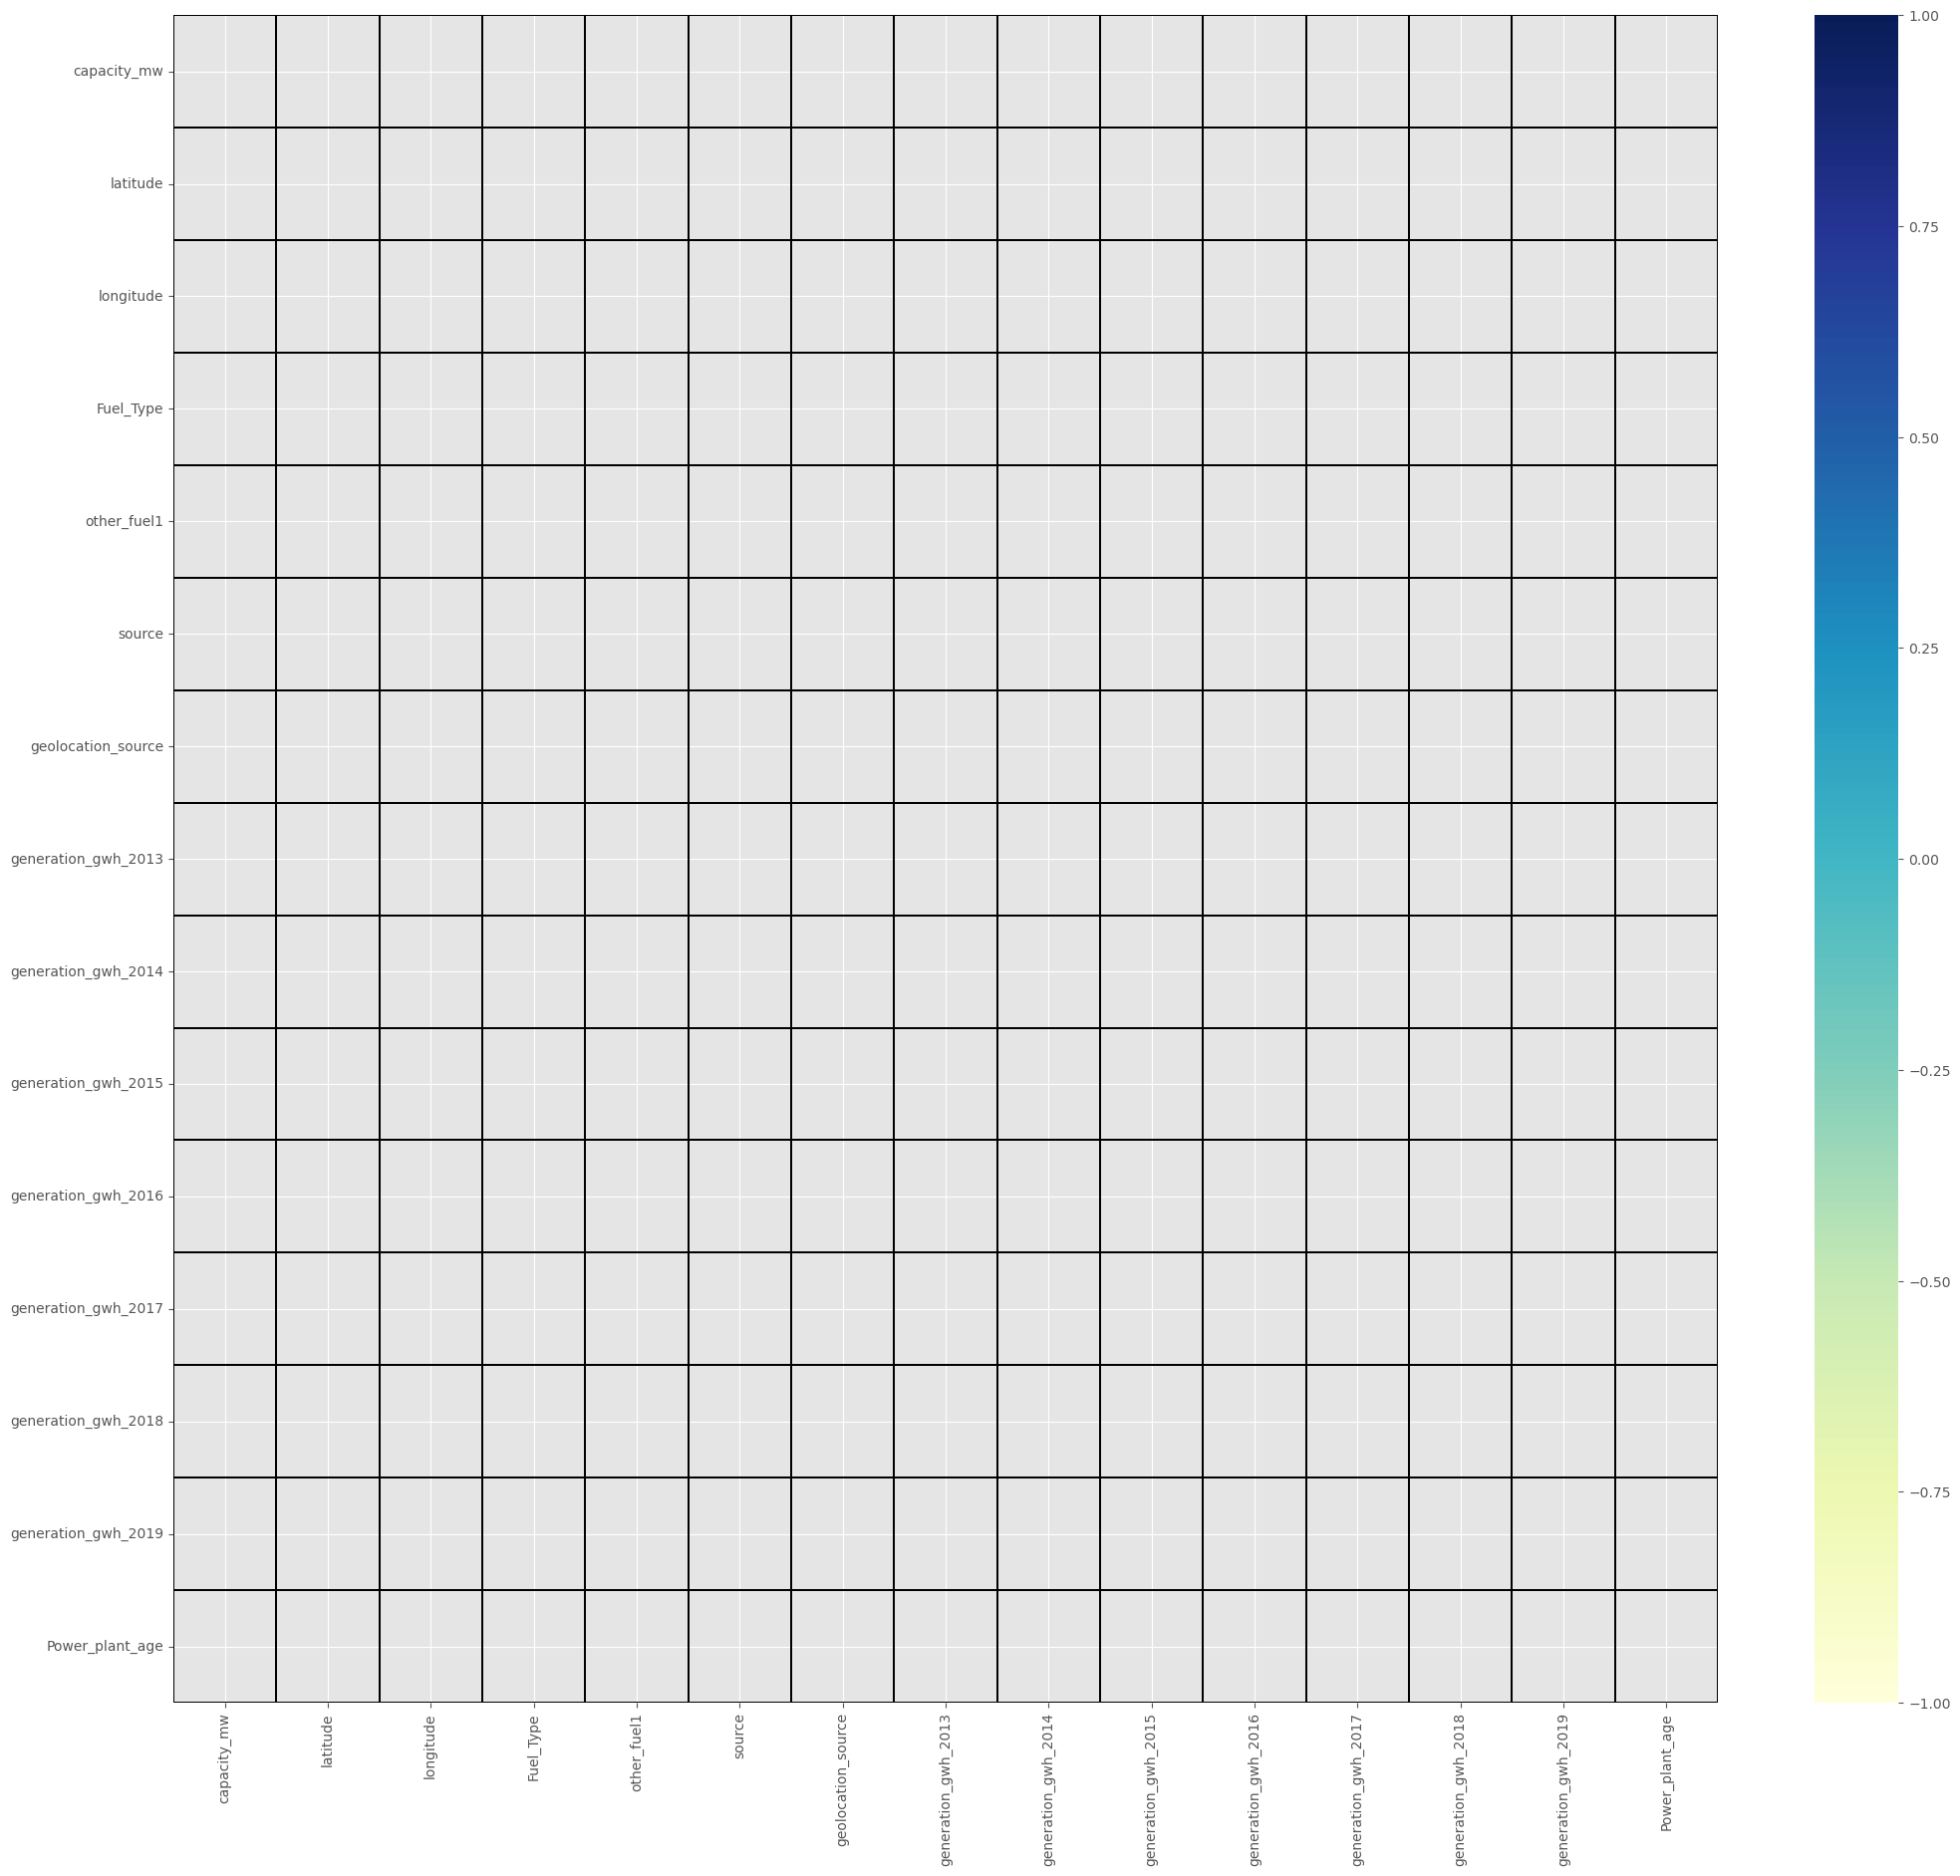

In [82]:
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor='black',annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

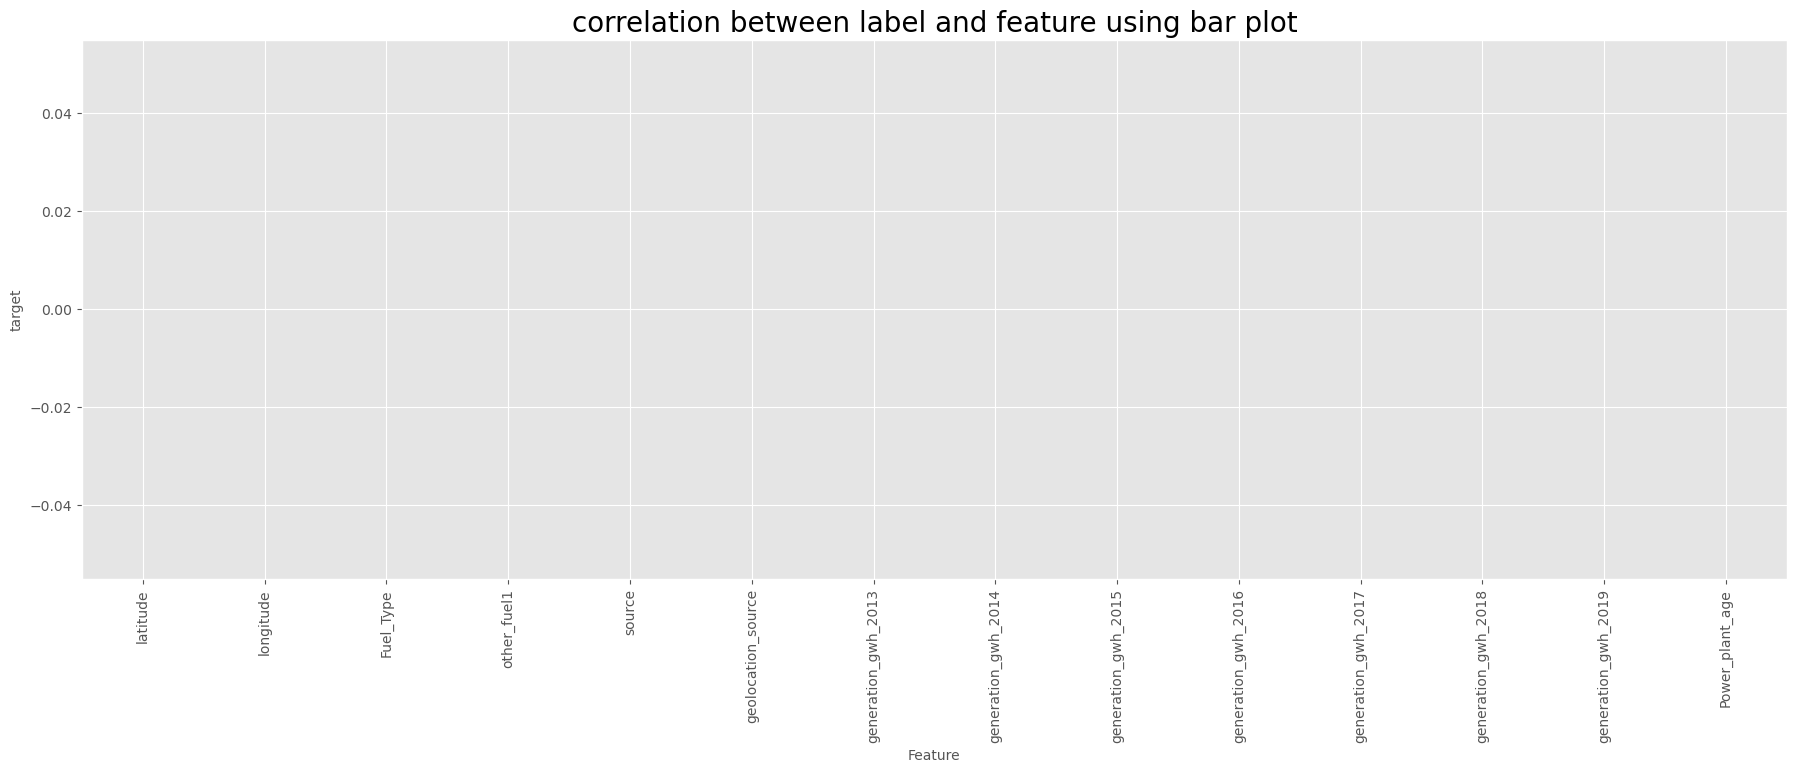

In [83]:
plt.figure(figsize=(22,7))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()


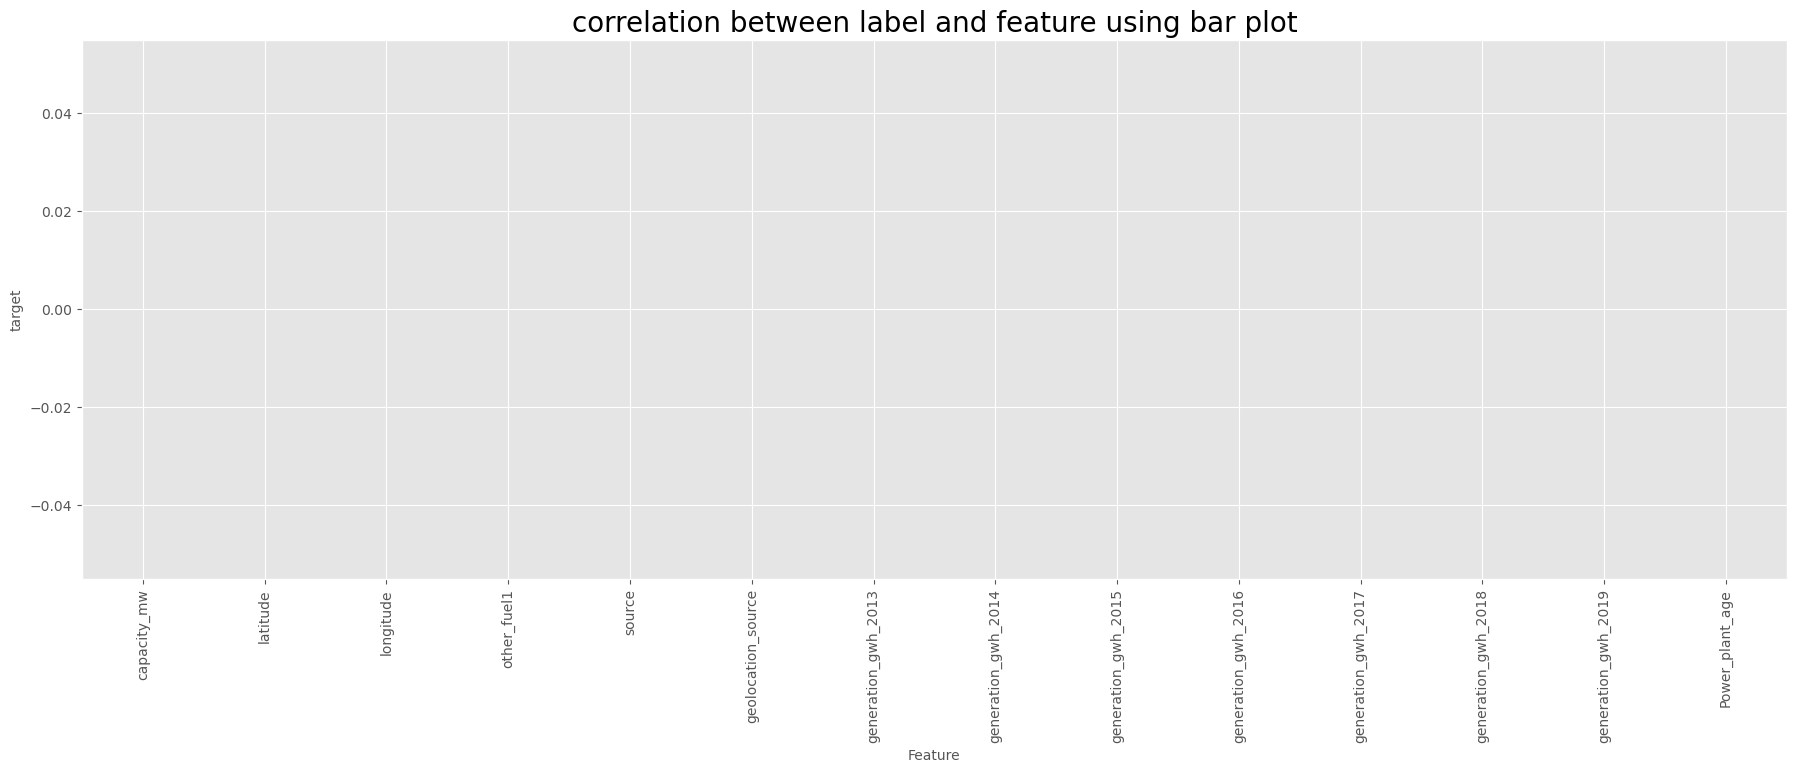

In [84]:
plt.figure(figsize=(22,7))
new_df.corr()['Fuel_Type'].sort_values(ascending=False).drop(['Fuel_Type']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

In [85]:
new_df.drop('other_fuel1',axis=1,inplace=True)
new_df.drop('latitude',axis=1,inplace=True)

In [86]:
new_df.head()

Empty DataFrame
Columns: [capacity_mw, longitude, Fuel_Type, source, geolocation_source, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, Power_plant_age]
Index: []

In [87]:
x= new_df.drop('capacity_mw',axis=1)
y= new_df['capacity_mw']

In [88]:
x.shape

(0, 12)

In [89]:
y.shape

(0,)

In [91]:
x.skew()

longitude              NaN
Fuel_Type              NaN
source                 NaN
geolocation_source     NaN
generation_gwh_2013    NaN
generation_gwh_2014    NaN
generation_gwh_2015    NaN
generation_gwh_2016    NaN
generation_gwh_2017    NaN
generation_gwh_2018    NaN
generation_gwh_2019    NaN
Power_plant_age        NaN
dtype: object

In [92]:
skew = ['longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [94]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

ValueError: Found array with 0 sample(s) (shape=(0, 7)) while a minimum of 1 is required by PowerTransformer.

In [95]:
x.skew()

longitude              NaN
Fuel_Type              NaN
source                 NaN
geolocation_source     NaN
generation_gwh_2013    NaN
generation_gwh_2014    NaN
generation_gwh_2015    NaN
generation_gwh_2016    NaN
generation_gwh_2017    NaN
generation_gwh_2018    NaN
generation_gwh_2019    NaN
Power_plant_age        NaN
dtype: object

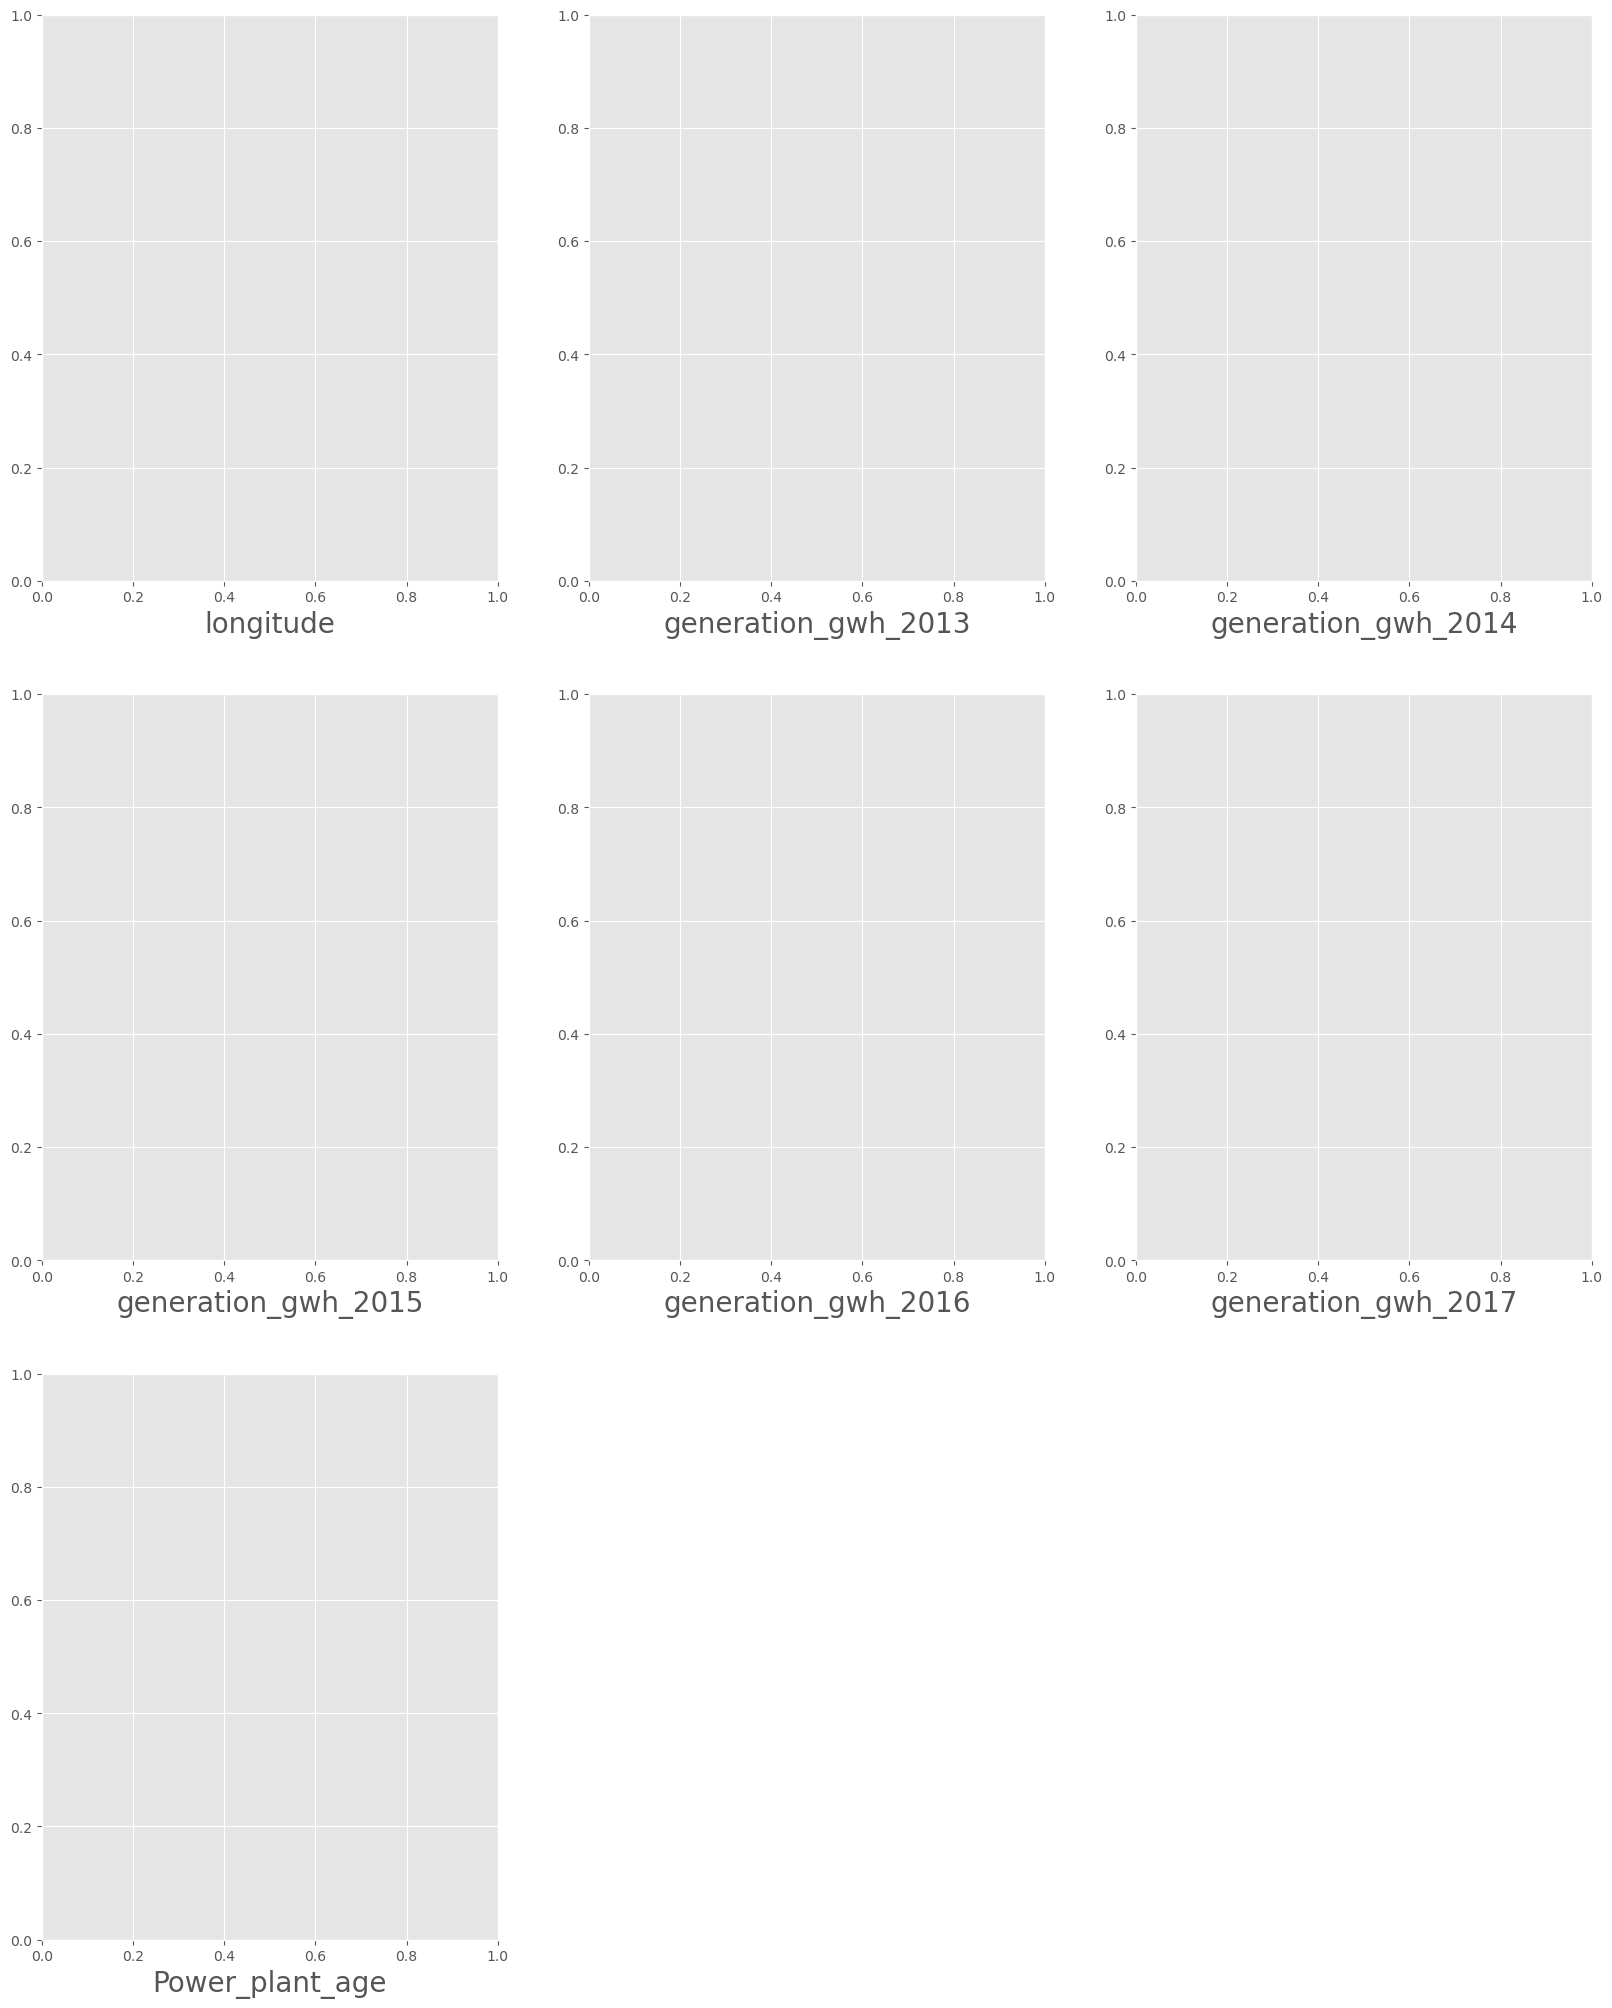

In [96]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={'shade': True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

ValueError: Found array with 0 sample(s) (shape=(0, 12)) while a minimum of 1 is required by StandardScaler.

In [98]:
# Checking VIF (Variance Inflation Factor ) Values

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for  i in range(len(x.columns))]
vif['features'] = x.columns


vif

ValueError: zero-size array to reduction operation maximum which has no identity

In [100]:
x.head()


Empty DataFrame
Columns: [longitude, Fuel_Type, source, geolocation_source, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, Power_plant_age]
Index: []

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [102]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [104]:
x_df = new_df.drop("Fuel_Type", axis=1)
y_df = new_df["Fuel_Type"]

In [105]:
x_df.shape

(0, 12)

In [106]:
y_df.shape

(0,)

In [107]:
x_df.skew()

capacity_mw            NaN
longitude              NaN
source                 NaN
geolocation_source     NaN
generation_gwh_2013    NaN
generation_gwh_2014    NaN
generation_gwh_2015    NaN
generation_gwh_2016    NaN
generation_gwh_2017    NaN
generation_gwh_2018    NaN
generation_gwh_2019    NaN
Power_plant_age        NaN
dtype: object